In [1]:
!wget https://www.dropbox.com/s/w4u9owma52h8t4l/worms_harmonic.t7 -O worms_harmonic.t7

--2019-04-10 13:01:00--  https://www.dropbox.com/s/w4u9owma52h8t4l/worms_harmonic.t7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w4u9owma52h8t4l/worms_harmonic.t7 [following]
--2019-04-10 13:01:00--  https://www.dropbox.com/s/raw/w4u9owma52h8t4l/worms_harmonic.t7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf4859a3b2b7353e8ddae8b22b.dl.dropboxusercontent.com/cd/0/inline/AesOV91Ket-RMHMVzTQ-BUWW-8ZDTUlDC26Px7opb4lPtpPT6h6N5THB-cDitT-4Ea_b_kvK8cqRzIH59qfhvKxFL3PSSRIvqydujgIyOa2ymA/file# [following]
--2019-04-10 13:01:01--  https://ucbf4859a3b2b7353e8ddae8b22b.dl.dropboxusercontent.com/cd/0/inline/AesOV91Ket-RMHMVzTQ-BUWW-8ZDTUlDC26Px7opb4lPtpPT6h6N5THB-cDitT-4Ea_b_kvK8cqRzIH59qfhvKxFL3PSSRIvqydujgIyOa2ymA/file
R

In [9]:
import torch 
from torchvision import transforms
from harmonic import cluster
from models import UNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.CenterCrop(448),        
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5, 0.5, 0.5])])

sins = [[-10.27957820892334, 1.3967024087905884, 2.8719606399536133],
 [-42.62486267089844, 3.611276865005493, 1.9089478254318237],
 [-33.99772262573242, -0.23299844563007355, -0.5037446618080139],
 [-18.28744125366211, 4.426985263824463, -0.5736066102981567],
 [29.773433685302734, -0.08113036304712296, 0.8393508791923523],
 [-8.268046379089355, 0.033597033470869064, 1.5522394180297852],
 [0.7675176858901978, -4.629482746124268, 1.9060850143432617],
 [-0.9893818497657776, 19.173843383789062, -3.758657932281494],
 [-0.5943151116371155, -36.07362365722656, 1.2640318870544434],
 [-0.28905314207077026, 2.9335758686065674, 0.2935348451137543],
 [-0.8447716236114502, -20.75826072692871, -2.8999669551849365],
 [0.2188388705253601, -24.464981079101562, -0.18283100426197052]]


net = torch.nn.DataParallel(UNet(1, sins), [0]).to(device)
wdict = torch.load('worms_harmonic.t7')
for k in wdict.keys():
    if k.endswith('num_batches_tracked'):
        wdict.pop(k)
net.load_state_dict(wdict)
net.eval()
print("Model loaded")

Model loaded


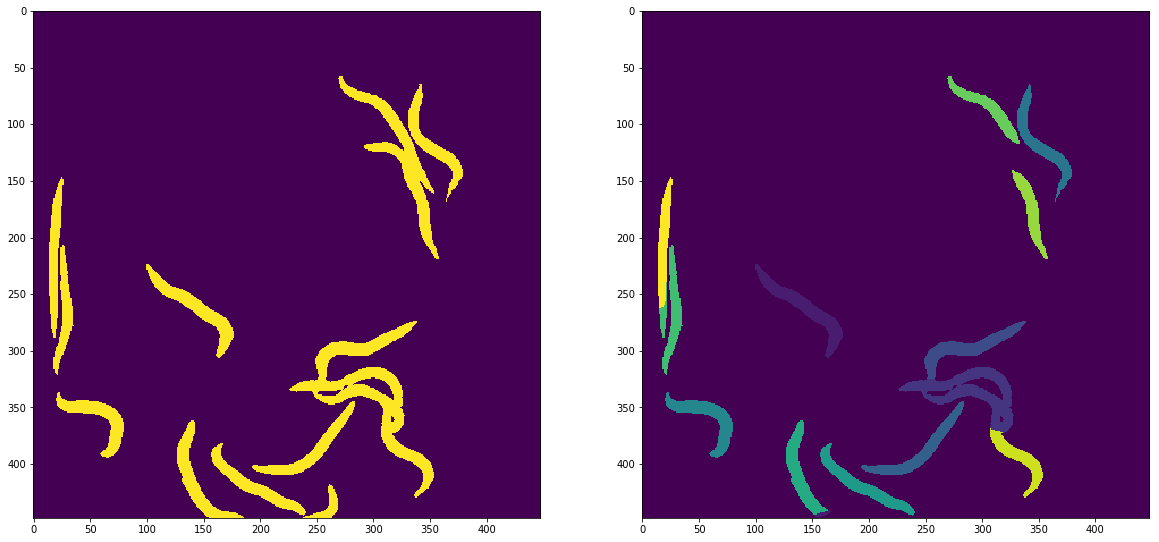

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("images/worms.png").convert('RGB')
#estimate the embeddings
x = transform(img)[:1]
emb = net(x.unsqueeze(0).to(device)).detach().cpu().numpy()
#cluster embeddings space
cc = cluster(emb[0],0.5,semantic=x[0].numpy()>0,minimal_area=500)

f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].imshow(x[0])
ax[1].imshow(cc)